# Цвета шума, RS анализ и Показатель Хёрста

---

**Преподаватель**: [Сильчев Виталий Артемович](https://www.hse.ru/staff/vsilchev)

**Студент**: Волков Андрей Андреевич, ББИ 174


## Оглавление

- [Цвет шума](#Цвет-шума)
    - [Белый шум](#Белый-шум)
    - [Розовый шум](#Розовый-шум)
    - [Броуновский (красный, «коричневый») шум](#Броуновский-(красный,-«коричневый»)-шум)
    - [Синий (голубой) шум](#Синий-(голубой)-шум)
    
- [RS анализ и показатель Херста](#RS-анализ-и-показатель-Херста)
- [Показатели Херста для разных шумов](#Показатели-Херста-для-разных-шумов)
- [RS анализ обменного курса доллара к евро](#RS-анализ-обменного-курса-доллара-к-евро)

Импортируем все необходимые модули

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nolds
import IPython.display as ipd
from acoustics import generator as gen

# modern way to generate random values in numpy
rng = np.random.default_rng()

## Цвет шума

В аудиотехнике, электронике, физике и многих других областях цвет шума относится к спектру мощности шумового сигнала (сигнала, генерируемого стохастическим процессом). 

Разные цвета шума имеют существенно различимые свойства: например, в качестве аудиосигналов они будут звучать с разным диапазоном, а в качестве изображений они будут иметь разную текстуру.

Это чувство «цвета» для шумовых сигналов аналогично понятию тембра в музыке, которое также называют «тоновым цветом».

Цветовые соответствия различных типов шумового сигнала определяются с помощью графиков (гистограмм) спектральной плотности, то есть распределения мощности сигнала по частотам. 

### Белый шум

Белый шум — это сигнал с равномерной спектральной плотностью на всех частотах и дисперсией, равной бесконечности. Является стационарным случайным процессом. Белый шум является единственным процессом, в котором значения сигнала в разные моменты времени не зависят друг от друга и никак не связаны (автокорреляция отсутствует). 

Другими словами, такой сигнал имеет одинаковую мощность в одинаковой полосе частот любой части диапазона. К примеру сигнал полосой в 20 Гц между 40 и 60 Гц имеет такую же мощность, что и сигнал полосой 20 Гц между 4000 и 4020 Гц. Неограниченный по частоте белый шум возможен только в теории, так как в этом случае его мощность бесконечна. На практике сигнал может быть белым шумом только в ограниченной полосе частот.

Для построения гистограммы белого шума, сгенерируем $2^{13}$ точек непрерывного равномерного распределения и построим гисторамму из этого набора данных.

In [191]:
# генерация набора данных для белого шума
points_num = np.power(2, 13)
white_noise = rng.uniform(0, 110, points_num)

Для того, чтобы конвертировать гистограмму в звук, достаточно представить ось $oX$ как **частоту** (Гц), а ось $oY$ как **интенсивность** (дБ). 

Добавим названия осям для наглядности.

In [192]:
def plot_noise(data, color_name, color = 'blue'):
    plt.figure(figsize=(20, 7))

    plt.title('Спектр {} шума'.format(color_name))
    plt.xlabel('Частота (Гц)')
    plt.ylabel('Интенсивность (дБ)')

    plt.plot(data, color = color)

In [193]:
# увеличивает кол-во данных в 4 раза для большей длительности аудиозаписи
def get_sound_data(data):
    for i in range(4): data = np.append(data, data)
    return data

In [194]:
def build_sound_by_noise(noise):
    return ipd.Audio(get_sound_data(noise), rate=25000)

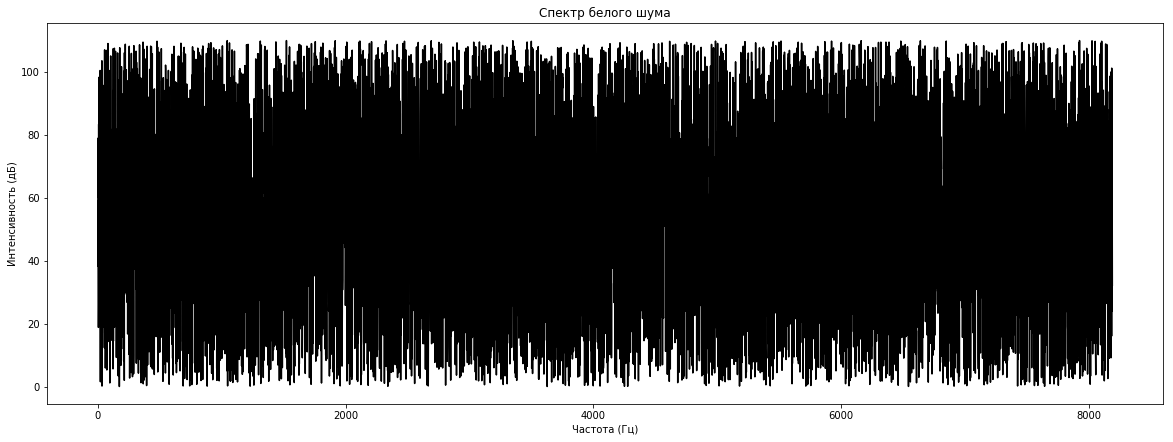

In [195]:
plot_noise(white_noise, color_name = 'белого', color = 'k')

Теперь напишем функцию, которая будет воспроизводить звук по гистограмме. Получим следующий результат.

In [196]:
build_sound_by_noise(white_noise)

### Розовый шум

В прикладных областях известен также как мерцательный (фликкер-шум), $1/f$ шум. Спектральная плотность мощности розового шума определяется формулой ~${\displaystyle 1/f}$ (плотность обратно пропорциональна частоте), то есть он является равномерно убывающим в логарифмической шкале частот. Например, мощность сигнала в полосе частот между 40 и 60 Герц равна мощности в полосе между 4000 и 6000 Герц. Спектральная плотность такого сигнала по сравнению с белым шумом затухает на 3 децибела на каждую октаву. Шум мерцаний обладает «памятью» о своём прошлом, равномерной в логарифмической шкале времени.

Розовый шум обнаруживается, например, в сердечных ритмах, в графиках электрической активности мозга, в электромагнитном излучении космических тел, а также практически в любых электронных и механических устройствах.

Иногда обобщённым розовым шумом называют любой шум, спектральная плотность которого уменьшается с увеличением частоты, то есть включают также красный (броуновский) и другие случайные процессы с забыванием во времени.

In [197]:
pink_noise = gen.pink(points_num)

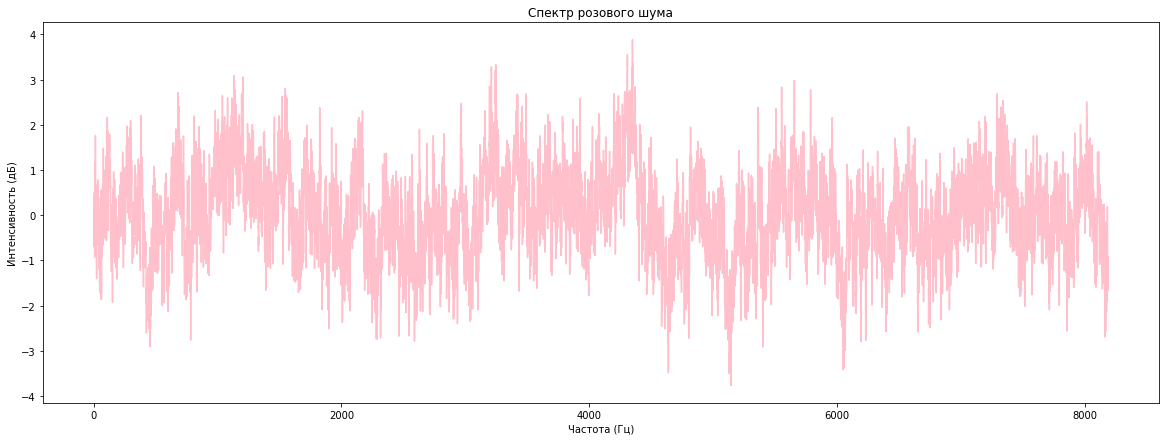

In [198]:
plot_noise(pink_noise, color_name = 'розового', color = 'pink')

In [199]:
build_sound_by_noise(pink_noise)

### Броуновский (красный, «коричневый») шум

Спектральная плотность красного шума пропорциональна $1/f²$, где $f$ — частота. Это означает, что на низких частотах шум имеет больше энергии, чем на высоких. Энергия шума падает на 6 децибел на октаву. Акустический красный шум слышится как приглушённый, в сравнении с белым или розовым шумом. Может быть получен путём интегрирования белого шума (с математической точки зрения интеграл от гауссовского белого шума известен под названием "винеровский процесс") или с помощью алгоритма, симулирующего броуновское движение. Спектр красного шума зеркально-противоположен спектру фиолетового.

На слух броуновский шум воспринимается более «тёплым», чем белый.

In [200]:
brown_noise = gen.brown(points_num)

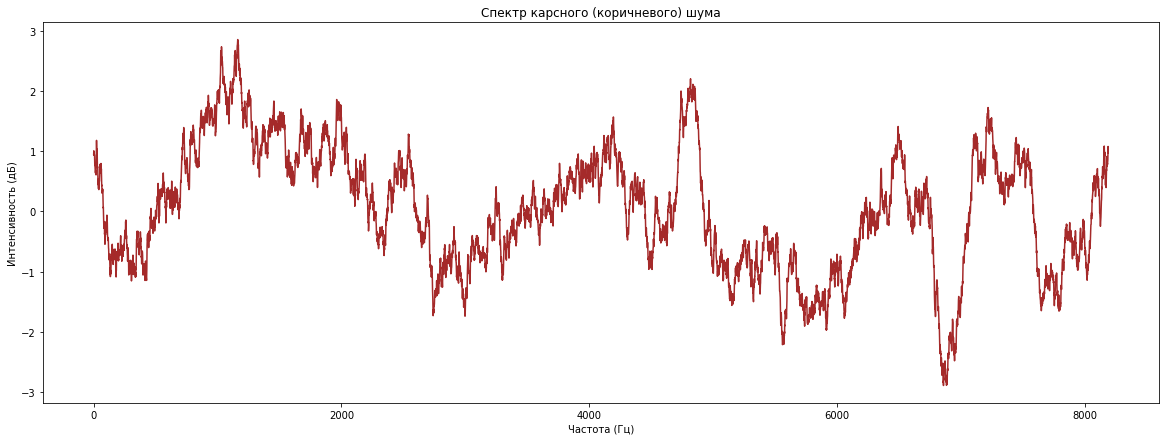

In [217]:
plot_noise(brown_noise, color_name = 'карсного (коричневого)', color = 'brown')

In [202]:
build_sound_by_noise(brown_noise)

### Синий (голубой) шум

Синий шум — вид сигнала, чья спектральная плотность увеличивается на 3 дБ на октаву. То есть его спектральная плотность увеличивается с ростом частоты, и, аналогично белому шуму, на практике он должен быть ограничен по частоте. На слух синий шум воспринимается более резким, нежели белый. Близким к синему шуму является спектр черенковского излучения. Синий шум получается, если продифференцировать розовый шум их спектры зеркальны.

In [203]:
blue_noise = gen.blue(points_num)

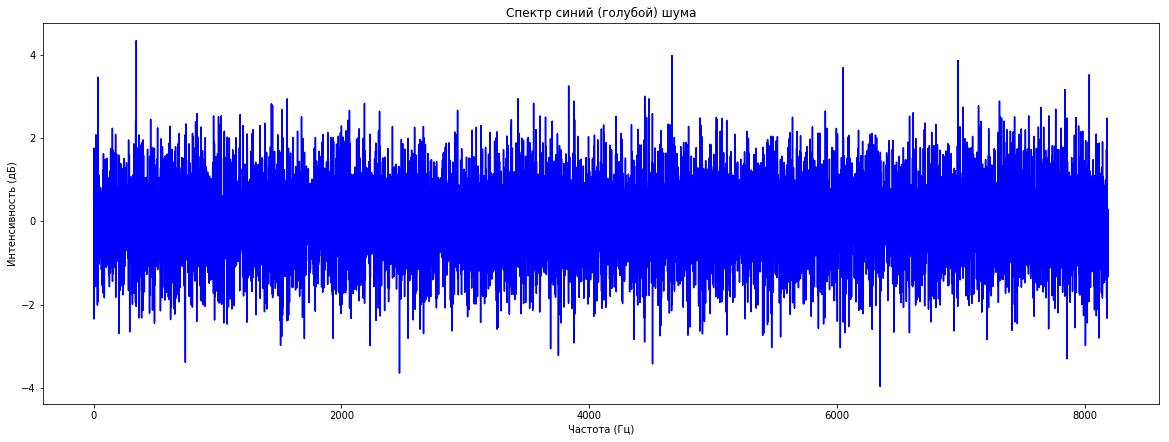

In [204]:
plot_noise(blue_noise, color_name = 'синий (голубой)', color = 'blue')

In [218]:
build_sound_by_noise(blue_noise)

### Фиолетовый шум

Фиолетовый шум — вид сигнала, чья спектральная плотность увеличивается на 6 дБ на октаву. То есть его спектральная плотность пропорциональная квадрату частоты и, аналогично белому шуму, на практике он должен быть ограничен по частоте. Фиолетовый шум получается, если продифференцировать белый шум по времени. Спектр фиолетового шума зеркально противоположен спектру красного.

In [219]:
violet_noise = gen.violet(points_num)

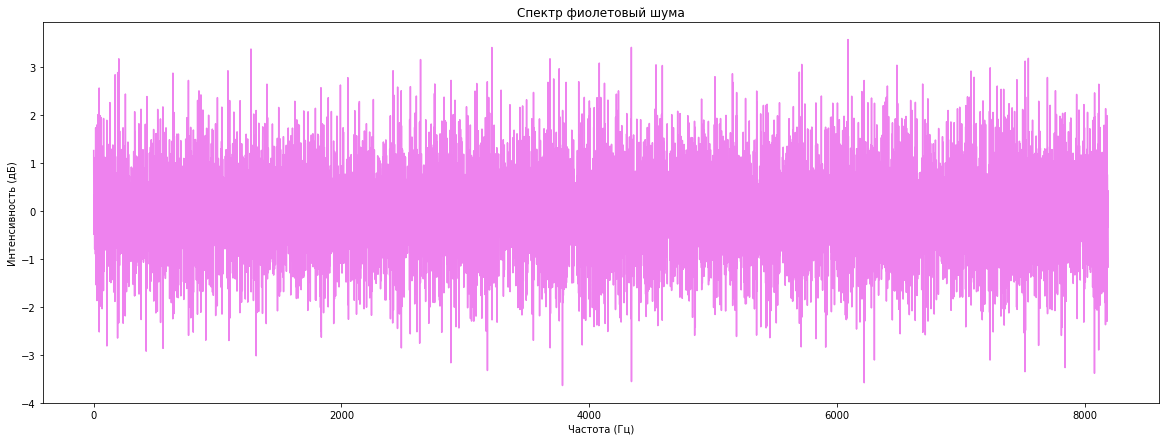

In [221]:
plot_noise(violet_noise, color_name = 'фиолетовый', color = 'violet')

In [222]:
build_sound_by_noise(violet_noise)

## RS анализ и показатель Херста

**RS-анализ** — совокупность статистических приёмов и методов анализа временных рядов (преимущественно финансовых), позволяющих определить некоторые важные их характеристики, такие как наличие непериодических циклов, памяти и т. п.

Пусть есть временной ряд из $N$ наблюдений:

$$ \{X_i\} = (X_1, X_2, \dots, X_N) $$

1. Временной ряд разбивается на $K$ смежных отрезков длиной $n$. Обозначим каждый из отрезков $\{X_{a,j}\}$, где $a=1, 2, \dots, K$

$$
\{X_i\} \to \{X_{1,j}\}, \{X_{2,j}\}, \dots, \{X_{K,j}\} \\
\{X_{a,j}\} = (X_{a,1}, X_{a,2}, \dots, X_{a,n})  = (X_{n(a-1)+1}, X_{n(a-1)+2},\dots,X_{an})
$$

2. Для каждого отрезка рассчитывается среднее значение:

$$ m_a = \frac{1}{n} \sum_{j=1}^n X_{a,j}$$

3. Для каждого отрезка рассчитываются отклонения от среднего значения в этом отрезке:

$$ \{Y_{a,j}\}: \quad Y_{a,j} = X_{a,j} - m_a,\quad j = 1, 2, \dots, n $$


4. Ряд первых накопленных отклонений:

$$ Z_{a,j} = \sum_{t=1}^j Y_{a,t} $$

5. Размах накопленных отклонений ($R$) и Стандартное отклонение ($S$):

$$
R_a = \max \left(Z_{a,1},Z_{a,2},\dots ,Z_{a,n}\right)-\min \left(Z_{a,1},Z_{a,2},\dots ,Z_{a,n}\right) \\
S_a = \sqrt{\frac{1}{n} \sum_{j=1}^n \left(Y_{a,j}\right)^2}
$$

6. Среднее значение RS (Rescaled Range) по всем отрезками для выбранной длины $n$:

$$ RS_n = \operatorname {E} \left[ R_a/S_a \right]$$

7. Увеличиваем $n$ и повторяем шаги 2-6.

Нас интересует зависимость $RS_n$ от $n$ в двойном логарифмическом масштабе. Иными словами,

$$ RS_n \sim n^H$$

где $H$ - показатель Хёрста.

Последовательности, для которых $H > 0.5$, считаются персистентными — они сохраняют имеющуюся тенденцию, то есть возрастание в прошлом более вероятно приводит к возрастанию в дальнейшем, и наоборот. При значении $0.5$ явной тенденции не выражено, а при меньших значениях процесс характеризуется антиперсистентностью — любая тенденция стремится смениться противоположной.

## Показатели Херста для разных шумов

Как уже было сказано, RS анализ и показатель Херста используются, в основном, для анализа финансовых временных рядов. Основываясь на этих данных, аналитики делают прогнозы по росту или падению акций, формируют уровень доверия к активу. 

Чтобы лучше понять как изменяется показатель в зависимости от набора данных, получим его для приведенных выше шумов.

Для начала вычислим показатель Херста по описанному выше алгоритму.

In [260]:
hurst = lambda noise: round(nolds.hurst_rs(noise), 4)

# builds hurst regression plot
def hurst_plot(noise): 
    h_wn, debug_data = nolds.hurst_rs(noise, fit='poly', corrected=False, debug_data=True, debug_plot=True)
    return h_wn

In [247]:
hurst_white = hurst(white_noise)
hurst_pink = hurst(pink_noise)
hurst_brown = hurst(brown_noise)
hurst_blue = hurst(blue_noise)
hurst_violet = hurst(violet_noise)

In [253]:
white_hurst_result = "Белый шум - " + str(hurst_white)
pink_hurst_result = "Розовый шум - " + str(hurst_pink)
brown_hurst_result = "Коричневый шум - " + str(hurst_brown)
blue_hurst_result = "Голубой шум - " + str(hurst_blue)
violet_hurst_result = "Фиолетовый шум - " + str(hurst_violet)

print("\n".join([white_hurst_result, pink_hurst_result, brown_hurst_result, blue_hurst_result, violet_hurst_result]))

Белый шум - 0.5042
Розовый шум - 0.8885
Коричневый шум - 0.9383
Голубой шум - 0.1916
Фиолетовый шум - 0.091


Сравним гистограммы шумов с их показателями Херста.

Text(0.5, 1.0, 'Фиолетовый шум - 0.091')

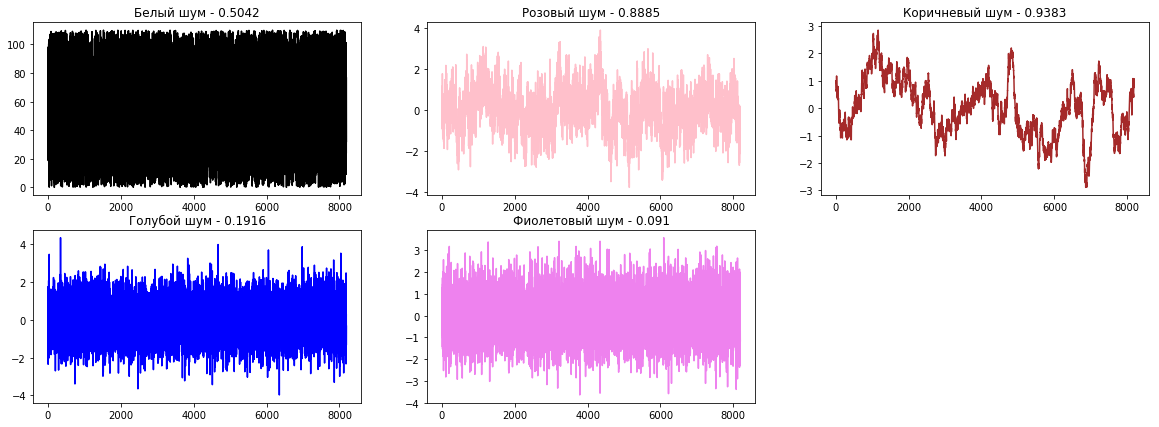

In [249]:
plt.figure(figsize=(20, 7))

plt.subplot(2, 3, 1)
plt.plot(white_noise, color = 'black')
plt.title('Белый шум - ' + str(hurst_white))

plt.subplot(2, 3, 2)
plt.plot(pink_noise, color = 'pink')
plt.title('Розовый шум - ' + str(hurst_pink))

plt.subplot(2, 3, 3)
plt.plot(brown_noise, color = 'brown')
plt.title('Коричневый шум - ' + str(hurst_brown))

plt.subplot(2, 3, 4)
plt.plot(blue_noise, color = 'blue')
plt.title('Голубой шум - ' + str(hurst_blue))

plt.subplot(2, 3, 5)
plt.plot(violet_noise, color = 'violet')
plt.title('Фиолетовый шум - ' + str(hurst_violet))

Из приведенных выше гистограмм можно сделать следующие выводы.

1. Только на одном из графиков - на графике белого шума - значение показателя Херста практически равно 0.5. Такой показатель говорит о том, что явной тенденции в данных выявлено не было и временной ряд представлен весьма хаотично, что действительно следует из гистограммы белого шума, которая больше похожа на черный прямоугольник, чем на временной ряд.

2. На графиках розового и коричневого шумов можно наблюдать достаточно высокие показатели Херста (0.8885 и 0.9383 соответственно). Такой показатель свидетельствует о персистентности временного ряда, о его способности сохранять имеющуюся тенденцию, то есть возрастание в прошлом более вероятно приводит к возрастанию в будущем, и наоборот. Что действительно видно из резких поворотов графика то вверх, то вниз.

3. На графиках голубого и фиолетового шума можно заметить достаточно низкие показатели Херста (0.1916 и 0.091 соответственно). Это говорит о антиперсистентности данных — любая тенденция стремится смениться противоположной. Обычно временные ряды акций с такими показателями Херста являются максимально рискованными, потому что будет очень трудно предсказать их поведение в дальнейшем.

## RS анализ обменного курса доллара к евро

Рассмотрим более прикладной пример применения показателя Херста и проанализируем цену евро по отношению к доллару.

Источник данных: [официальный сайт ФРС США](https://www.federalreserve.gov/datadownload/Choose.aspx?rel=H10)

In [266]:
eur_usd = pd.read_csv(
    filepath_or_buffer="https://raw.githubusercontent.com/vsilchev/hse-time-series/master/FRB_H10_EURUSD.csv",
    parse_dates=['date'],
    na_values='ND'
)
eur_usd = eur_usd.fillna(method='bfill')

In [268]:
eur_usd.head()

,date,rate
0,1999-01-04,1.1812
1,1999-01-05,1.1760
2,1999-01-06,1.1636
3,1999-01-07,1.1672
4,1999-01-08,1.1554


Построим график зависимости даты от цены по полученным данным.

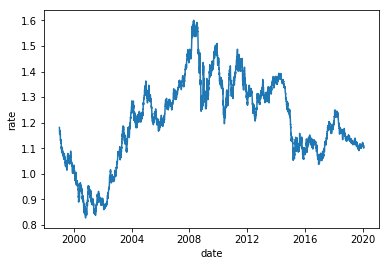

In [270]:
sns.lineplot(x='date', y='rate', data=eur_usd)

Получим показатель Херста, используя созданную выше функцию.

In [273]:
eur_usd_hurst = nolds.hurst_rs(eur_usd['rate'])

In [280]:
print("Показатель Херста для обменного курса EUR/USD: {}".format(eur_usd_hurst))

Показатель Херста для обменного курса EUR/USD: 0.9637984970792354


Дополнително построим линейную регрессию, чтобы убедиться в достоверности полулченного показателя.

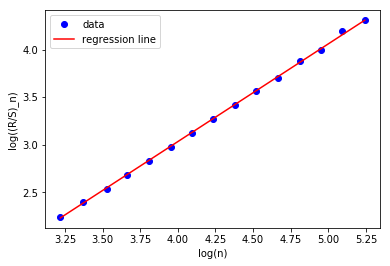

1.0254893972049326

In [282]:
hurst_plot(eur_usd['rate'])

Как и следовало ожидать, показатель Херста для обменного курса доллара к евро очень высокий - 0.9637. Что говорит о том, что временной ряд с высокой долей вероятности будет сохранять имеющуюся тенденцию. То есть рост в прошлом скорее всего приведет к росту в будущем и наоборот.